In [1]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms import centrality
from networkx.algorithms.community.centrality import girvan_newman

from operator import itemgetter

import numpy as np
import os
import pandas as pd
import sys

# Time Series

A time series is a simple line that comes in useful to show how data is changing. In this visualization, there is just one color that is presented on the graph.

In time series, it is more readable to replace the legend with text at the end of the time series because the text is immediately at the end of the line. Readers do not havve to look at the legend and back at the line to understand what they are seeing. However, this text has to be very short.

> In all graphs, it might make sense to add a subtitle underneath the title. This is shown in the first time series, but not in the others. In formal writing, the subtitle should be removed and shown instead as a caption.

In [2]:
line = np.linspace(0.4, 0.5, num=10) + np.random.normal(0, 0.03, 10)

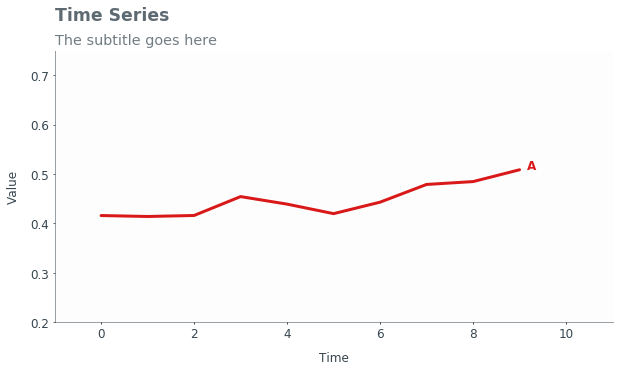

In [3]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,5))

plt.xlim(-1, 11)
plt.ylim(0.2, 0.75)
plt.xlabel('Time')
plt.ylabel('Value')

"""
Instead of adding a legend, add a text at the end of the time series.
"""
plt.plot(range(10), line, label='Time Series')
plt.text(9 + 0.15, line[-1], 'A', color='C0', fontweight=600)
# plt.legend()

plt.title('Time Series', loc='left', fontweight='bold', alpha=0.8,
         pad=30) # pad to make space for a subtitle
ax = plt.gca()
plt.text(0, 1.01, 'The subtitle goes here',
         fontsize='large', alpha=0.7,
         horizontalalignment='left', verticalalignment='bottom',
         transform=ax.transAxes)
plt.show()

## Multiple Time Series

Contrary to a normal time series, the multiple time series includes multiple distinct lines to contrast them for some effect. Three colors are provided natively. 

In [4]:
multi_line_1 = np.linspace(0.2, 0.4, num=10) + np.random.normal(0, 0.03, 10)
multi_line_2 = np.linspace(0.4, 0.6, num=10) + np.random.normal(0, 0.03, 10)
multi_line_3 = np.linspace(0.6, 0.8, num=10) + np.random.normal(0, 0.03, 10)

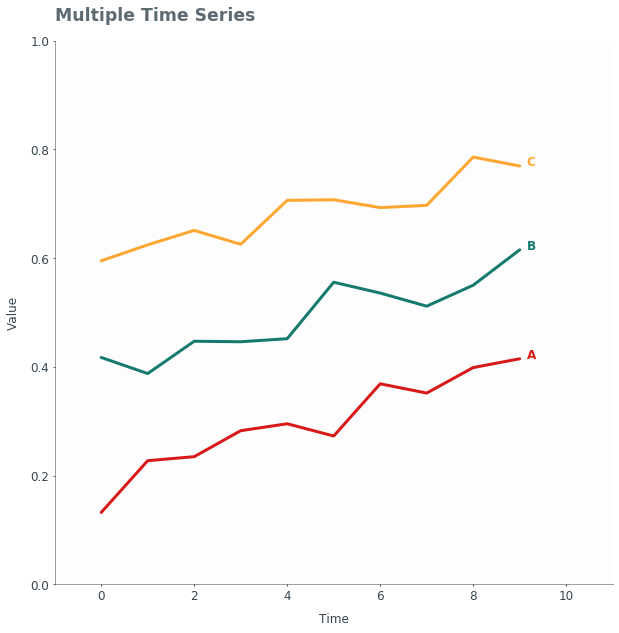

In [5]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,10))

plt.xlim(-1, 11)
plt.ylim(0, 1)
plt.xlabel('Time')
plt.ylabel('Value')

plt.plot(range(10), multi_line_1, label='Time Series Line 1')
plt.text(9 + 0.15, multi_line_1[-1], 'A', color='C0', fontweight=600)

plt.plot(range(10), multi_line_2, label='Time Series Line 2')
plt.text(9 + 0.15, multi_line_2[-1], 'B', color='C1', fontweight=600)

plt.plot(range(10), multi_line_3, label='Time Series Line 3')
plt.text(9 + 0.15, multi_line_3[-1], 'C', color='C2', fontweight=600)

# plt.legend()
plt.title('Multiple Time Series', loc='left', fontweight='bold', alpha=0.8)
plt.show()

### Comparison Time Series

The multiple time series should be used only when different results over the same timespans are being used. A comparison time series can be used to highlight one time series over others.

For example, two time series could show the tweet volume over time. The first, muted time series shows the base corpus. The second, highlighted time series shows a boosted corpus. In this timeseries, one time series is highlighted, whereas the other are muted. Different alpha values can be used if the muted time series need to be differentiated.

It is important that the legend or label at the end of the time series has the exact same style as the accompanying time series. This includes both the color and alpha. The font weight should also be similar to the time series when possible.

In [6]:
multi_comparison_line_1 = np.linspace(0.2, 0.4, num=10) + np.random.normal(0, 0.03, 10)
multi_comparison_line_2 = np.linspace(0.4, 0.6, num=10) + np.random.normal(0, 0.03, 10)
multi_comparison_line_3 = np.linspace(0.6, 0.8, num=10) + np.random.normal(0, 0.03, 10)

cross_comparison_line_1 = np.linspace(0.2, 0.4, num=10) + np.random.normal(0, 0.03, 10)
cross_comparison_line_2 = np.linspace(0.4, 0.6, num=10) + np.random.normal(0, 0.03, 10)
cross_comparison_line_3 = np.linspace(0.6, 0.4, num=10) + np.random.normal(0, 0.03, 10)

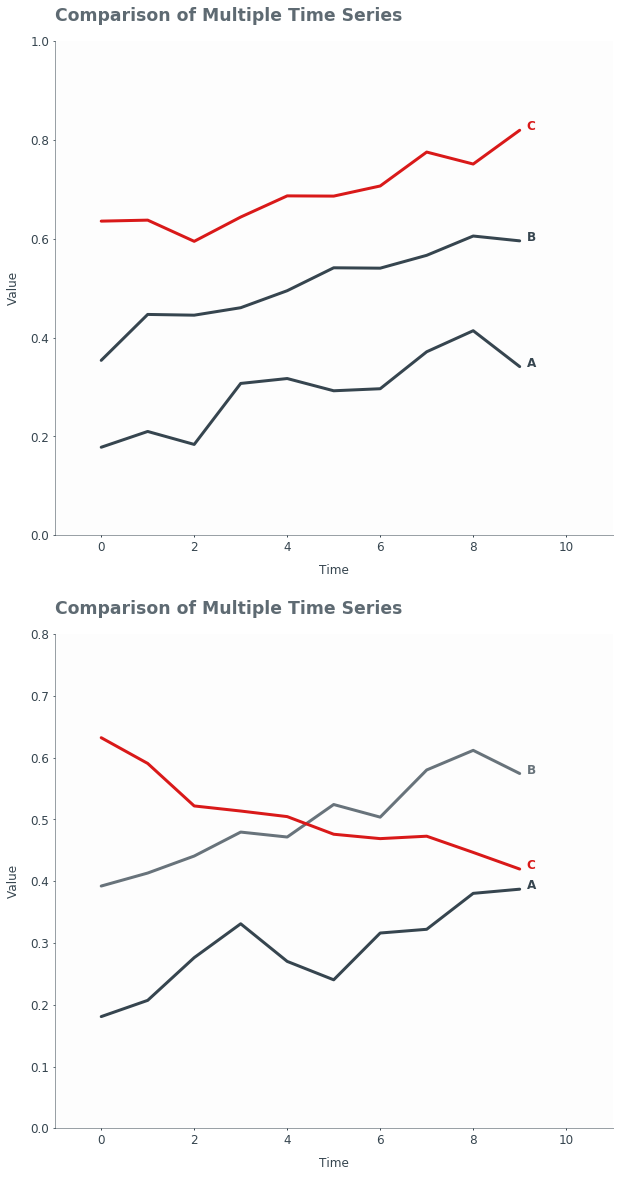

In [7]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))

"""
Demonstration of time series that stack over each other.
"""

ax1.set_xlim(-1, 11)
ax1.set_ylim(0, 1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')

ax1.plot(range(10), multi_comparison_line_1, color='C3', label='Muted Time Series 1')
ax1.text(9 + 0.15, multi_comparison_line_1[-1], 'A', color='C3', fontweight=600)

ax1.plot(range(10), multi_comparison_line_2, color='C3', label='Muted Time Series 2')
ax1.text(9 + 0.15, multi_comparison_line_2[-1], 'B', color='C3', fontweight=600)

ax1.plot(range(10), multi_comparison_line_3, label='Highlighted Time Series')
ax1.text(9 + 0.15, multi_comparison_line_3[-1], 'C', color='C0', fontweight=600)

# ax1.legend()
ax1.set_title('Comparison of Multiple Time Series', loc='left', fontweight='bold', alpha=0.8)

"""
Demonstration of time series that cross each other.
"""

ax2.set_xlim(-1, 11)
ax2.set_ylim(0, 0.8)
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')

ax2.plot(range(10), cross_comparison_line_1, color='C3', label='Muted Time Series 1')
ax2.text(9 + 0.15, cross_comparison_line_1[-1], 'A', color='C3', fontweight=600)

ax2.plot(range(10), cross_comparison_line_2, color='C3', alpha = 0.75, label='Muted Time Series 2')
ax2.text(9 + 0.15, cross_comparison_line_2[-1], 'B', color='C3', alpha=0.75, fontweight=600)

ax2.plot(range(10), cross_comparison_line_3, label='Highlighted Time Series')
ax2.text(9 + 0.15, cross_comparison_line_3[-1], 'C', color='C0', fontweight=600)

# ax2.legend()
ax2.set_title('Comparison of Multiple Time Series', loc='left', fontweight='bold', alpha=0.8)

plt.show()

# Graphs

Graphs are used to show how different items are connected together. In this style, graph's edges should have constant width. To record the weight or value of an edge, its opacity should vary.

Graph rendering is more manual than anything else. The nodes are rendered using a scatter plot, the edges are lines and the labels are added separately.

In [8]:
complex_graph = pd.DataFrame({ 
    'from':  ['A', 'B', 'C', 'A', 'C', 'P', 'Q', 'R', 'S', 'D'], 
    'to':    ['D', 'A', 'E', 'C', 'D', 'Q', 'R', 'S', 'Q', 'S'],
    'weight': [0.2, 0.2, 0.1, 0.6, 0.2, 0.2, 0.2, 0.1, 0.3, 0.6]
})

"""
Generate a new graph.
"""

graph = nx.from_pandas_edgelist(complex_graph, 'from', 'to', True)
positions = nx.spring_layout(graph)

ordered_positions = sorted(positions.items(), key=lambda x: x[0])
x = [ x for _, (x, y) in ordered_positions ]
y = [ y for _, (x, y) in ordered_positions ]

edges = {}
for source, target in graph.edges:
    edges[(source, target)] = (positions[source], positions[target], graph.edges[source, target]["weight"])

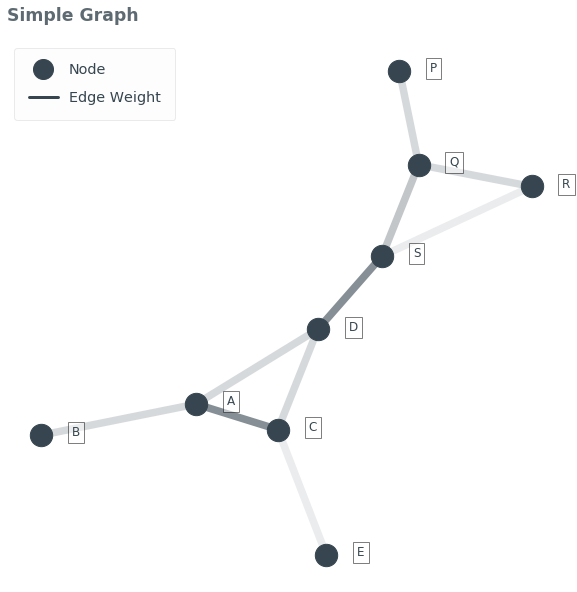

In [9]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,10))

"""
The nodes are rendered first as a scatter plot.
"""
plt.scatter(x, y, s=500, zorder=2, color='C3')

"""
The edges are rendered next as lines.
"""
for (x1, y1), (x2, y2), weight in edges.values():
    plt.plot([x1, x2], [y1, y2], zorder=1,
        color='C3',
        alpha=weight,
        linewidth=7.5,
        label="_nolegend_")

"""
Finally, the labels are printed next to the nodes.
"""
for i, text in enumerate(sorted(graph.nodes)):
    plt.text(x[i]+0.075, y[i]-0.005, text, bbox=dict(facecolor='white', alpha=0.5))

"""
The axis are hidden from the plot.
"""
plt.axis("off")
plt.title("Simple Graph", loc='left', fontweight='bold', alpha=0.8)

"""
The legend has to be drawn manually.
"""
patches = [ Line2D([], [], marker='o', ls='', markeredgecolor='C3', markersize=20,
                   markerfacecolor='C3', label="Node"),
            Line2D([], [], ls='-', color='C3', label="Edge Weight")]
plt.legend(handles=patches, numpoints=1)

plt.show()

## Community Graph

In the community graph, the colors of nodes change according to the community that they 
belong to. For clarity, edges between nodes in different communities should be excluded.

In the next example, the most central edge is removed by the Girvan-Newman algorithm. The first removed edge is between D and S because all paths from nodes `A` to `D` go through it to get to nodes `P` to `S`.

> Note that in the next iteration, two edges are removed. First, one of the edges from `A` to `D` or from `D` to `C` are removed because the edge from `A` to `C` is too heavy, and thus most paths in the new community go `A` to `D` and from `D` to `C`. After one of these edges is removed, the Girvan-Newman algorithm removes the edge from `A` to `C` because only one path goes from `C` to `D` now, and thus has a low betweenness.

These kind of graphs should always be in the muted color. Any communities that need highlighting should be highlighted, but there should not be more than two colors at the same time. Otherwise, the graph risks becoming too cheerful and informal.

In [10]:
"""
In this example, the most central edge is removed at each iteration when identifying communities.
Other approaches are possible, including by removing the heaviest edge.
"""
def heaviest(graph):
    u, v, w = max(graph.edges(data='value'), key=itemgetter(2))
    return (u, v)

def most_central_edge(G):
    centrality = betweenness(G, weight='weight')
    return max(centrality, key=centrality.get)

community_iterator = girvan_newman(graph, most_valuable_edge=most_central_edge)
communities = tuple(sorted(community) for community in next(community_iterator))

"""
The community assignment is added to the nodes themselves.
"""
community_assignment = {}
for node in graph.nodes:
    for c, community in enumerate(communities):
        if node in community:
            community_assignment[node] = c
            break

nx.set_node_attributes(graph, community_assignment, 'community')

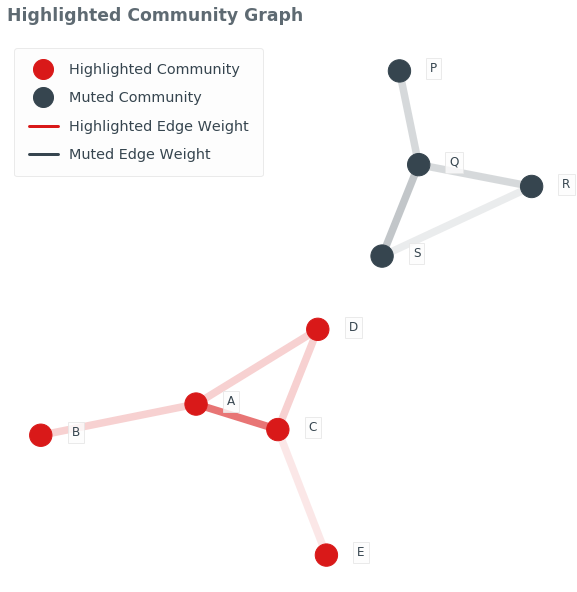

In [11]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,10))

"""
The nodes are rendered first as a scatter plot.
"""
community_colors = [ "C0" if graph.nodes[node]['community'] == 0 else "C3" for node in sorted(graph.nodes) ]
plt.scatter(x, y, s=500, zorder=2, color=community_colors)

"""
The edges are rendered next as lines.
Differently from before, edges are only drawn if the two nodes are in the same community.
"""
for (source, target), ((x1, y1), (x2, y2), weight) in edges.items():
    if community_assignment[source] == community_assignment[target]:
        plt.plot([x1, x2], [y1, y2], zorder=1,
            color=("C0" if community_assignment[source] == 0 else "C3"),
            alpha=weight,
            linewidth=7.5,
            label="_nolegend_")

"""
Finally, the labels are printed next to the nodes.
"""
for i, text in enumerate(sorted(graph.nodes)):
    plt.text(x[i]+0.075, y[i]-0.005, text, bbox=dict(facecolor='#fdfdfd', edgecolor='0.9', alpha=0.8))

"""
The axis are hidden from the plot.
"""
plt.axis("off")
plt.title("Highlighted Community Graph", loc='left', fontweight='bold', alpha=0.8)

"""
The legend has to be drawn manually.
"""
node_patches = [ Line2D([], [], marker='o', ls='', markersize=20,
                        markeredgecolor="C0", markerfacecolor="C0",
                        label=f"Highlighted Community"),
                 Line2D([], [], marker='o', ls='', markersize=20,
                        markeredgecolor="C3", markerfacecolor="C3",
                        label=f"Muted Community"),
               ]
edge_patches = [ Line2D([], [], ls='-', color="C0", label=f"Highlighted Edge Weight"),
                 Line2D([], [], ls='-', color="C3", label=f"Muted Edge Weight")
               ]
plt.legend(handles=(node_patches + edge_patches), numpoints=1)

plt.show()

In some cases, it may be necessary to highlight single nodes, either in graphs or in communities. In these cases too, all nodes should be muted and the highlighted nodes should be the only ones with a different tone.

In the following example, the most central node in each community is highlighted.

In [12]:
"""
Extract the most central nodes from each community.
"""
highlighted_nodes = []
for community in communities:
    subgraph = graph.subgraph(community)
    centrality_scores = centrality.eigenvector_centrality(subgraph) # calculate the centrality of nodes
    highlighted_nodes.append(max(centrality_scores, key=centrality_scores.get))

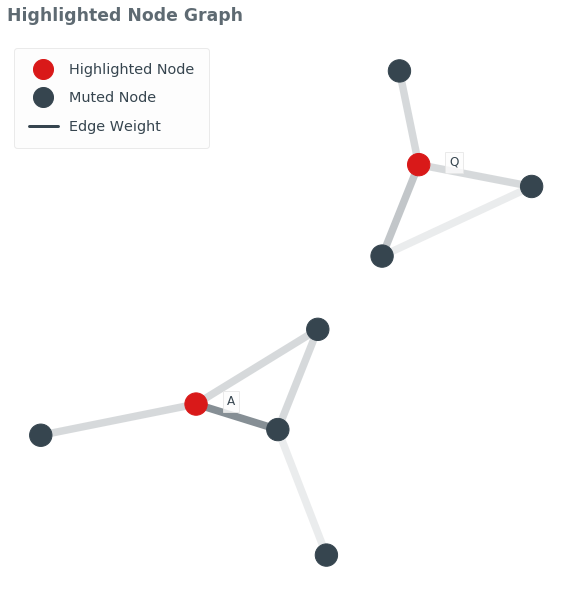

In [13]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,10))

"""
The nodes are rendered first as a scatter plot.
"""
node_colors = [ "C0" if node in highlighted_nodes else "C3" for node in sorted(graph.nodes) ]
plt.scatter(x, y, s=500, zorder=2, color=node_colors)

"""
The edges are rendered next as lines.
Differently from before, edges are only drawn if the two nodes are in the same community.
"""
for (source, target), ((x1, y1), (x2, y2), weight) in edges.items():
    if community_assignment[source] == community_assignment[target]:
        plt.plot([x1, x2], [y1, y2], zorder=1,
            color="C3",
            alpha=weight,
            linewidth=7.5,
            label="_nolegend_")

"""
Finally, the labels are printed next to the nodes.
"""
for i, text in enumerate(sorted(graph.nodes)):
    if text in highlighted_nodes:
        plt.text(x[i]+0.075, y[i]-0.005, text, bbox=dict(facecolor='#fdfdfd', edgecolor='0.9', alpha=0.8))

"""
The axis are hidden from the plot.
"""
plt.axis("off")
plt.title("Highlighted Node Graph", loc='left', fontweight='bold', alpha=0.8)

"""
The legend has to be drawn manually.
"""
node_patches = [ Line2D([], [], marker='o', ls='', markersize=20,
                        markeredgecolor="C0", markerfacecolor="C0",
                        label=f"Highlighted Node"),
                 Line2D([], [], marker='o', ls='', markersize=20,
                        markeredgecolor="C3", markerfacecolor="C3",
                        label=f"Muted Node"),
               ]
edge_patches = [ Line2D([], [], ls='-', color="C3", label=f"Edge Weight") ]
plt.legend(handles=(node_patches + edge_patches), numpoints=1)

plt.show()